<a href="https://colab.research.google.com/github/bilik49/algorithms_itmo/blob/main/algorithms_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Part I.

In [2]:
def cube(x):
    return x ** 3

def module(x):
    return abs(x - 0.2)

def sin(x):
    return x * np.sin(1 / x)

functions = [cube, module, sin]

In [3]:
eps = 0.001
N = int(1 / eps)

In [4]:
def exhaustive_search(f):
    a = []
    num_iter = 0
    if f.__name__ == 'sin':
        for i in range(0, 1001):
            num_iter += 1
            a.append(f(0.99 / N * i + 0.01))
    else:
        for i in range(0, 1001):
            num_iter += 1
            a.append(f(i / N))
    return min(a), len(a), num_iter

In [5]:
print("(min f, f-calculations, N of iterations)")
for f in functions:
    print(str(f.__name__)+":", exhaustive_search(f))

(min f, f-calculations, N of iterations)
cube: (0.0, 1001, 1001)
module: (0.0, 1001, 1001)
sin: (-0.21722960129123117, 1001, 1001)


In [6]:
def dichotomy(f, a, b):
    num_iter = 0
    s = 0
    delta = 0.0009
    while abs(a-b) >= eps:
        num_iter += 1
        s += 2
        x1 = (a + b - delta) / 2
        x2 = (a + b + delta) / 2
        if f(x1) <= f(x2):
            b = x2
        else:
            a = x1
    return f((a + b) / 2), s + 1, num_iter

In [7]:
print("(min f, f-calculations, N of iterations)")
for f in functions:
    print(str(f.__name__)+":", dichotomy(f, 0, 1) if not f.__name__ == 'sin' else dichotomy(f, 0.01, 1))

(min f, f-calculations, N of iterations)
cube: (1.1093111164523245e-10, 29, 14)
module: (7.785034179669248e-06, 29, 14)
sin: (-0.2172336224666543, 29, 14)


In [8]:
def golden_section(f, a, b):
    num_iter = 0
    s = 0
    x1 = a + (3 - np.sqrt(5)) / 2 * (b - a)
    x2 = b + (np.sqrt(5) - 3) / 2 * (b - a)
    f1 = f(x1)
    f2 = f(x2)
    while abs(a-b) >= eps:
        num_iter += 1
        s += 1
        if f1 <= f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + (3 - np.sqrt(5)) / 2 * (b - a)
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = b + (np.sqrt(5) - 3) / 2 * (b - a)
            f2 = f(x2)
    return f((a + b) / 2), s + 3, num_iter

In [9]:
print("(min f, f-calculations, N of iterations)")
for f in functions:
    print(str(f.__name__)+":", golden_section(f, 0, 1) if not f.__name__ == 'sin' else golden_section(f, 0.01, 1))

(min f, f-calculations, N of iterations)
cube: (4.9256800857728296e-11, 18, 15)
module: (7.331374358568454e-05, 18, 15)
sin: (-0.21723232817753246, 18, 15)


# Part II.

In [10]:
alpha = random.uniform (0, 1)
beta = random.uniform (0, 1)

xk = np.array([i/100 for i in range(0, 101)])
yk = [alpha * i + beta + random.normalvariate(0, 0.2) for i in xk]

In [11]:
eps = 0.001
N = int(1 / eps)

In [12]:
def f_linear(x, a, b):
    return a * x + b
def f_ration(x, a, b):
    return a / (1 + b * x)

In [13]:
def exhaustive_linear(N):
    res = []
    for a in range(N + 1):
        a = a / N
        for b in range(N + 1):
            b = b / N
            s = 0
            for k in range(len(xk)):
                s += (f_linear(xk[k], a, b) - yk[k]) ** 2
            res.append([s, a, b])

    return min(res, key=lambda x: x[0])[1:3]

[a, b, f-calculations, N of iterations] = [0.744, 0.875, 1002001, 1002001]


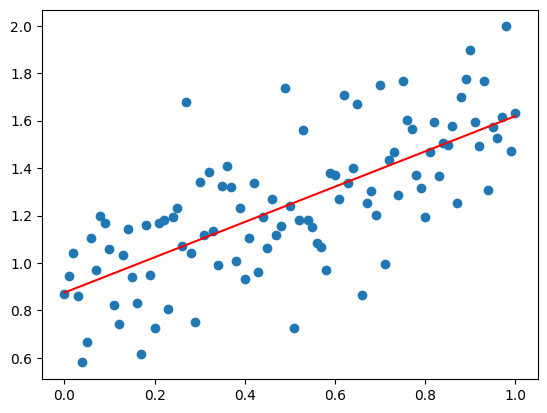

In [14]:
a, b = exh_linear_res = exhaustive_linear(N)
plt.scatter(xk,yk)
plt.plot(xk, f_linear(xk, a, b), 'r')

print('[a, b, f-calculations, N of iterations] =',[a, b, (N+1) ** 2, (N+1) ** 2])

In [15]:
def exhaustive_ration(N):
    res = []
    for a in range(N + 1):
        a = a / N
        for b in range(N + 1):
            b = -b / N
            s = 0
            for k in range(len(xk)):
                s += (f_ration(xk[k], a, b) - yk[k]) ** 2
            res.append([s, a, b])

    return min(res, key=lambda x: x[0])[1:3]

<ipython-input-12-f96495cf1790>:4: RuntimeWarning: invalid value encountered in double_scalars
  return a / (1 + b * x)
<ipython-input-12-f96495cf1790>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return a / (1 + b * x)


[a, b, f-calculations, N of iterations] = [0.943, -0.444, 1002001, 1002001]


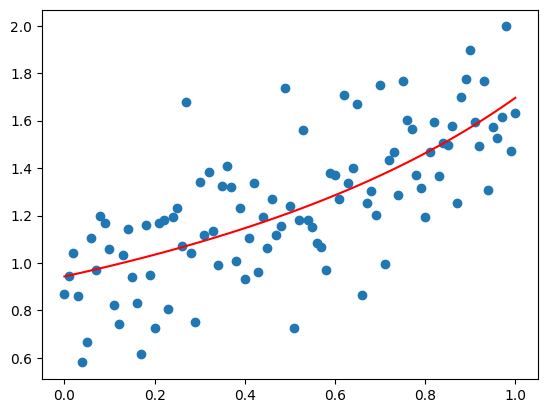

In [16]:
a, b = exh_ration_res= exhaustive_ration(N)
plt.scatter(xk,yk)
plt.plot(xk, f_ration(xk, a, b), 'r')

print('[a, b, f-calculations, N of iterations] =',[a, b, (N+1) ** 2, (N+1) ** 2])

In [17]:
def exhaustive(N, F, a = None, b = None):
    res = []
    for i in range(N + 1):
        x = i / N
        s = 0
        for k in range(len(xk)):
            f_val = F(xk[k], x, b) if a == None else F(xk[k], a, x)
            s += (f_val - yk[k]) ** 2
        res.append(s)
    return np.argmin(res) / N

In [18]:
def coordinate_descent_linear(N):
    a_curr = 0.05
    b_curr = 0.05
    a_prev = b_prev = 0
    num_iter = 0
    f_calc = 0
    while abs(a_curr - a_prev) >= eps and abs(b_curr - b_prev) >= eps:
        num_iter += 2
        a_prev = a_curr
        a_curr = exhaustive(N, f_linear, b = b_curr)
        f_calc += N + 1
        b_prev = b_curr
        b_curr = exhaustive(N, f_linear, a = a_curr)
        f_calc += N + 1
    return a_curr, b_curr, f_calc, num_iter

[a,b, f-calculations, N of iterations] = [0.746, 0.874, 32032, 32]


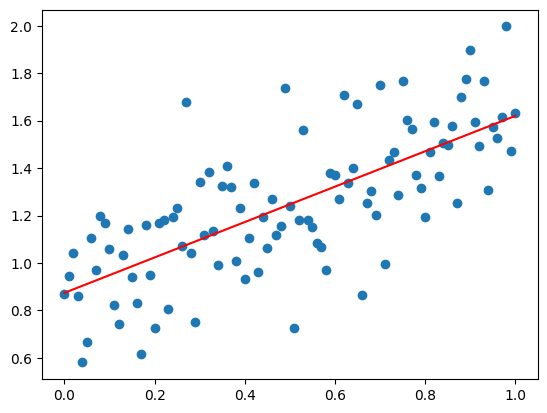

In [19]:
a, b, f_calc, num_iter = coordinate_descent_linear(N)
cd_linear_res = [a, b]
plt.scatter(xk,yk)
plt.plot(xk, f_linear(xk, a, b), 'r')

print('[a,b, f-calculations, N of iterations] =',[a, b, f_calc, num_iter])

In [20]:
def coordinate_descent_ration(N):
    a_curr = 0.05
    b_curr = -0.05
    a_prev = b_prev = 0
    num_iter = 0
    f_calc = 0
    while abs(a_curr - a_prev) >= eps and abs(b_curr - b_prev) >= eps:
        num_iter += 2
        a_prev = a_curr
        a_curr = exhaustive(N, f_ration, b = b_curr)
        f_calc += N + 1

        b_prev = b_curr
        res = []
        for i in range(N+1):
            b = -i / N
            s = 0
            for k in range(len(xk)):
                s += (f_ration(xk[k], a_curr, b) - yk[k]) ** 2
            res.append(s)
        b_curr = np.argmin(res) / -N
        f_calc += N + 1
    return a_curr, b_curr, f_calc, num_iter

<ipython-input-12-f96495cf1790>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return a / (1 + b * x)


[a,b, f-calculations, N of iterations] = [0.946, -0.441, 22022, 22]


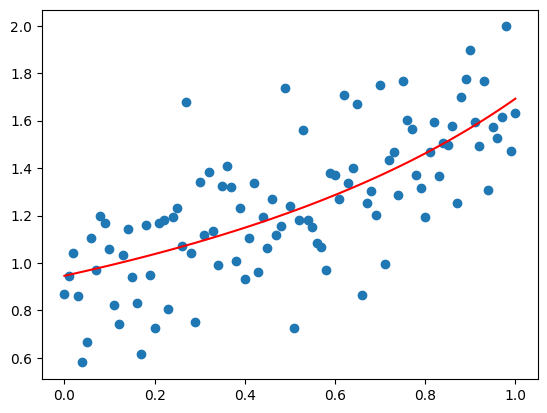

In [21]:
a, b, f_calc, num_iter = coordinate_descent_ration(N)
cd_ration_res = [a, b]
plt.scatter(xk,yk)
plt.plot(xk, f_ration(xk, a, b), 'r')

print('[a,b, f-calculations, N of iterations] =',[a, b, f_calc, num_iter])

In [22]:
def D_linear(par):
    a, b = par
    return sum((f_linear(xk, a, b) - yk) ** 2)
def D_ration(par):
    a, b = par
    return sum((f_ration(xk, a, b) - yk) ** 2)

In [23]:
def nelder_mead(f):
    from scipy.optimize import minimize
    res = minimize(f, [0.05, 0.05], method = 'nelder-mead')
    return res.x[0], res.x[1], res.nit, res.nfev

[a,b, f-calculations, N of iterations] = [0.7443929357321442, 0.874806218012782, 53, 100]


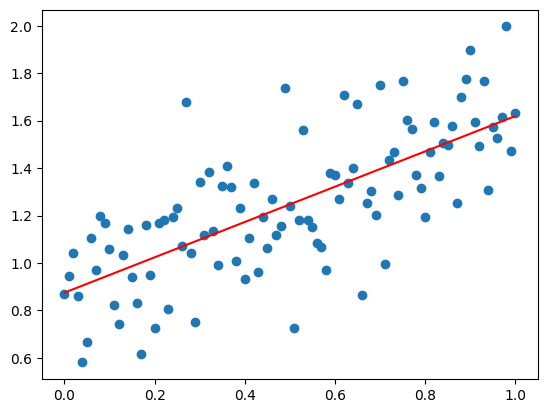

In [24]:
a, b, f_calc, num_iter = nelder_mead(D_linear)
nm_linear_res = [a, b]
plt.scatter(xk,yk)
plt.plot(xk, f_linear(xk, a, b), 'r')

print('[a,b, f-calculations, N of iterations] =',[a, b, f_calc, num_iter])

[a,b, f-calculations, N of iterations] = [0.9431127599892604, -0.44387656883935867, 60, 115]


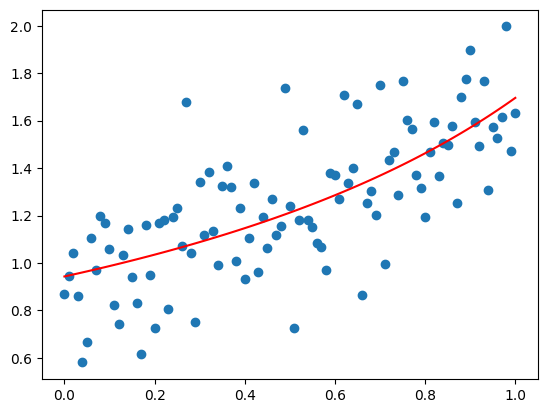

In [25]:
a, b, f_calc, num_iter = nelder_mead(D_ration)
nm_ration_res = [a, b]
plt.scatter(xk,yk)
plt.plot(xk, f_ration(xk, a, b), 'r')

print('[a,b, f-calculations, N of iterations] =',[a, b, f_calc, num_iter])

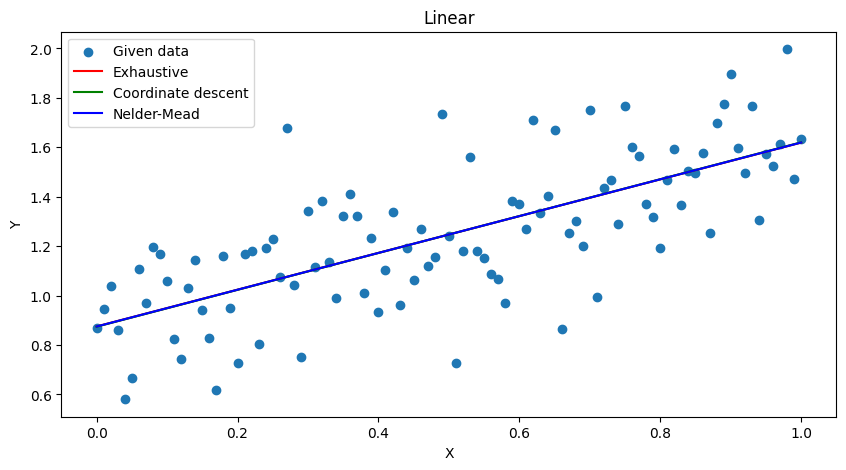

In [26]:
plt.figure(figsize=(10,5))
plt.title("Linear")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(xk,yk, label = "Given data")
plt.plot(xk, f_linear(xk, exh_linear_res[0], exh_linear_res[1]), 'r', label="Exhaustive")
plt.plot(xk, f_linear(xk, cd_linear_res[0], cd_linear_res[1]), 'g', label="Coordinate descent")
plt.plot(xk, f_linear(xk, nm_linear_res[0], nm_linear_res[1]), 'b', label="Nelder-Mead")
plt.legend()

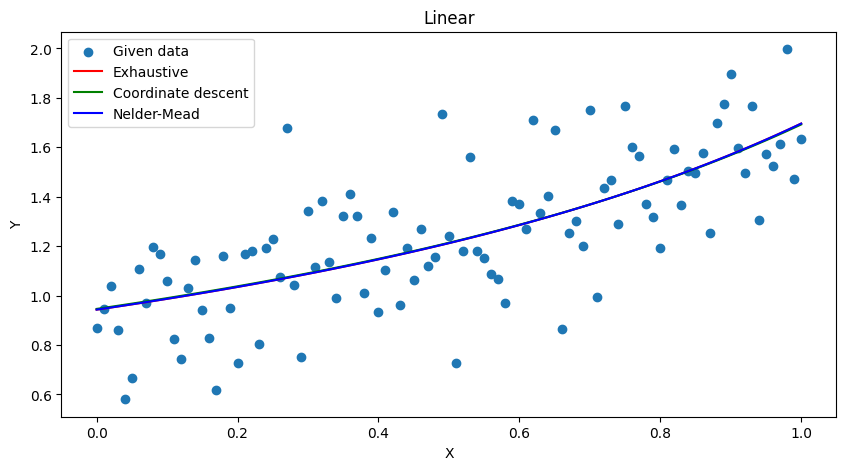

In [27]:
plt.figure(figsize=(10,5))
plt.title("Rational")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(xk,yk, label = "Given data")
plt.plot(xk, f_ration(xk, exh_ration_res[0], exh_ration_res[1]), 'r', label="Exhaustive")
plt.plot(xk, f_ration(xk, cd_ration_res[0], cd_ration_res[1]), 'g', label="Coordinate descent")
plt.plot(xk, f_ration(xk, nm_ration_res[0], nm_ration_res[1]), 'b', label="Nelder-Mead")
plt.legend()